In [1]:
import rebound
print(rebound.__build__)
import numpy as np
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib
    from matplotlib.patches import Rectangle

Oct 31 2016 12:19:41


In [2]:
sa = rebound.SimulationArchive("ias15_seed87_new.bin")
sar2 = rebound.SimulationArchive("ias15_seed87_new_restart.bin")

1 loop, best of 1: 1.79 s per loop


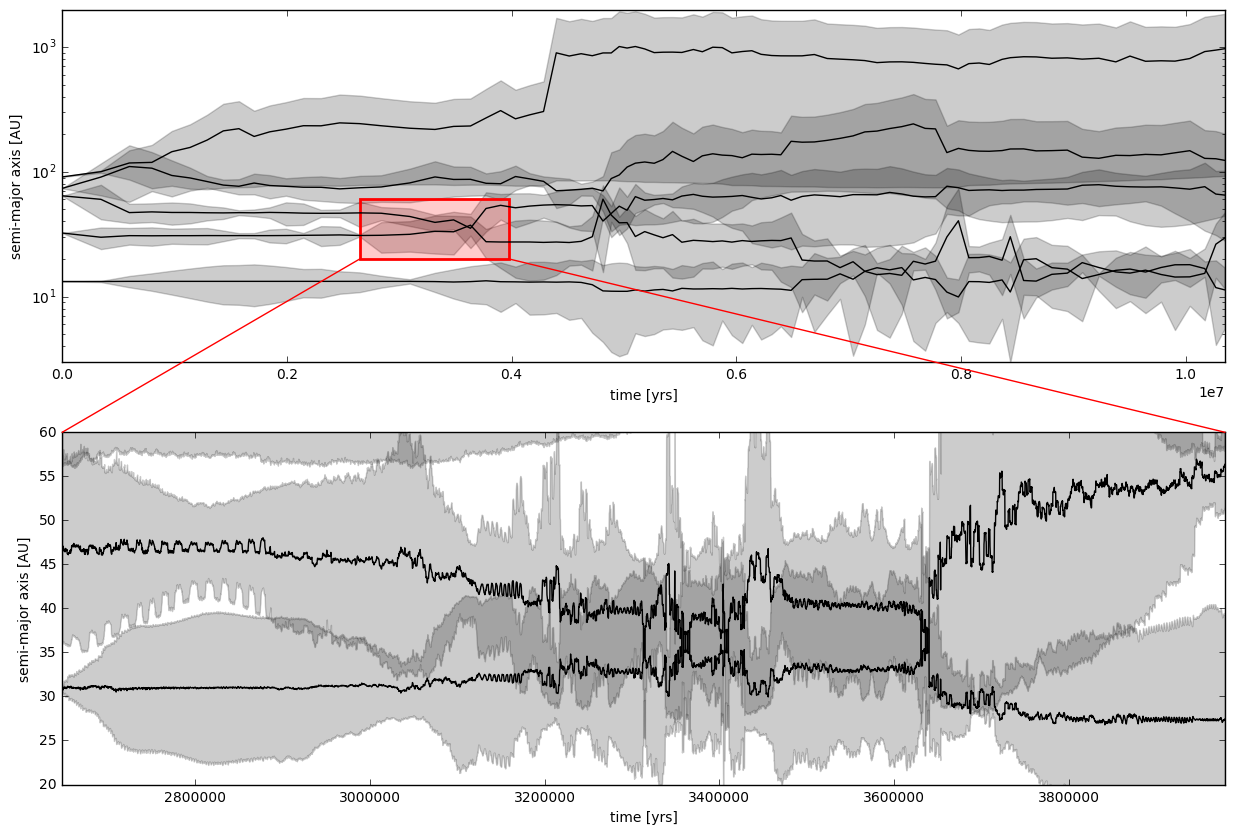

In [21]:
%%timeit -n1 -r1 
fig = plt.figure(figsize=(15, 10)) 
ax1 = plt.subplot(211)
data = np.zeros((1+sa[0].N,len(sa)))
date = np.zeros((1+sa[0].N,len(sa)))
for i, sim in enumerate(sa):
    data[0][i] = sim.t/2/np.pi
    for j in range(1,sim.N):
        o = sim.particles[j].calculate_orbit()
        data[j][i] = o.a
        date[j][i] = o.e
ax1.set_xlim([0,data[0][-1]])            
ax1.set_ylim([3,2000])   
ax1.set_yscale("log")
ax1.set_xlabel("time [yrs]")
ax1.set_ylabel("semi-major axis [AU]")
for j in range(1,sa[0].N):
    y1 = data[j]*(1.+date[j])
    y2 = data[j]*(1.-date[j])
    ax1.fill_between(data[0], y1, y2, where=y2 <= y1, facecolor='black',alpha=0.2)
    ax1.plot(data[0], data[j], color="black");    
ax1.add_patch(Rectangle((sar2.tmin/2/np.pi, 20), (sar2.tmax-sar2.tmin)/2/np.pi,   40,          
                       facecolor = "None", edgecolor = "red", linewidth = 2))    
ax1.add_patch(Rectangle((sar2.tmin/2/np.pi, 20), (sar2.tmax-sar2.tmin)/2/np.pi,   40,          
                       facecolor = "red", alpha = 0.2, linewidth = 0))    
ax2 = plt.subplot(212)
data = np.zeros((1+sar2[0].N,len(sar2)))
date = np.zeros((1+sar2[0].N,len(sar2)))
for i, sim in enumerate(sar2):
    data[0][i] = sim.t/2/np.pi
    for j in range(1,sim.N):
        o = sim.particles[j].calculate_orbit(primary=sim.particles[0])
        data[j][i] = o.a
        date[j][i] = o.e
ax2.set_xlim([data[0][0],data[0][-1]])            
ax2.set_ylim([20,60]) 
#ax2.set_yscale("log")
ax2.set_xlabel("time [yrs]")
ax2.set_ylabel("semi-major axis [AU]")
for j in range(1,sar2[0].N):
    y1 = data[j]*(1.+date[j])
    y2 = data[j]*(1.-date[j])
    ax2.fill_between(data[0], y1, y2, where=y2 <= y1, facecolor='black',alpha=0.2)
    ax2.plot(data[0], data[j], color="black");    

transFigure = fig.transFigure.inverted()

coord1 = transFigure.transform(ax1.transData.transform([sar2.tmin/2/np.pi, 20]))
coord2 = transFigure.transform(ax2.transData.transform([sar2.tmin/2/np.pi, 60]))
line = matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]),
                               transform=fig.transFigure, color="red")
fig.lines.append(line)


coord1 = transFigure.transform(ax1.transData.transform([sar2.tmax/2/np.pi, 20]))
coord2 = transFigure.transform(ax2.transData.transform([sar2.tmax/2/np.pi, 60]))
line = matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]),
                               transform=fig.transFigure, color="red")


fig.lines.append(line)
plt.savefig("closeencounter.pdf", format='pdf', bbox_inches='tight', pad_inches=0)